In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'C:\Users\Aditya\OneDrive\Desktop\Advertising_practice.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.shape

(200, 5)

In [4]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

no null values are present in the data set, this data set is pretty clear from null values 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


data set has continous data,we need not to convert anything to any type   

In [6]:
#Unnamed: 0 is a feature which acts like an index it not gives any information regarding the target variable
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [7]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
duplicate=data.duplicated()
duplicate.sum()

0

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

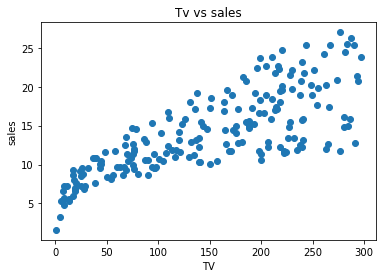

In [13]:
plt.scatter(x='TV', y='sales',data=data)
plt.xlabel('TV')
plt.ylabel('sales')
plt.title('Tv vs sales')
plt.show()

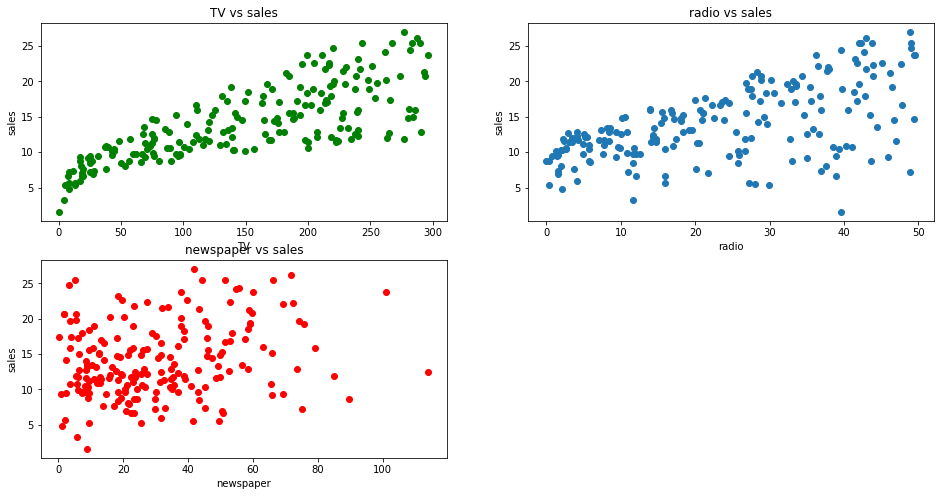

In [11]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.scatter(x='TV',y='sales',data=data,color='green')
plt.xlabel('TV')
plt.ylabel('sales')
plt.title('TV vs sales')
plt.subplot(2,2,1)

plt.subplot(2,2,2)
plt.scatter(x='radio',y='sales',data=data)
plt.xlabel('radio')
plt.ylabel('sales')
plt.title('radio vs sales')
plt.subplot(2,2,1)

plt.subplot(2,2,3)
plt.scatter(x='newspaper',y='sales',data=data,color='red')
plt.xlabel('newspaper')
plt.ylabel('sales')
plt.title('newspaper vs sales')
plt.subplot(2,2,1)



plt.show()

from the above plots we can see TV and radio has good relationship with the sales,no of TV and radio increase sales also increases so tv and radio has good relationship with the sales, the data in the newspaper is not following particular pattern so we cannot say it is has relationship with the sales or not 

In [12]:
corr=data.corr()

<AxesSubplot:>

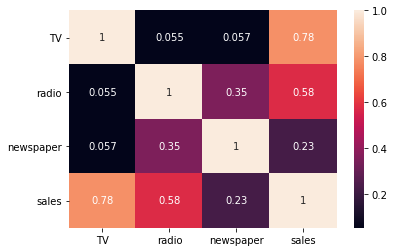

In [13]:
sns.heatmap(corr,annot=True)

Tv has high corelation with the target variable and radio also,but news paper has less correlation with the sales but newspaper is contributing something so we cannot say it is not usefull feature, but we do some more analysis to select best features, 

In [22]:
data.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

newspaper has some skewed data we

<AxesSubplot:xlabel='newspaper'>

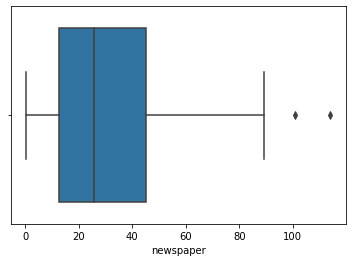

In [24]:
sns.boxplot(data['newspaper'])

In [11]:
#to remove skewness by using zscore

from scipy.stats import zscore

z=zscore(data[['newspaper']])

abs_z_score=np.abs(z)

filtering_entry=(abs_z_score<3).all(axis=1)

data=data[filtering_entry]

In [12]:
data['newspaper'].skew() #skewness is decreased

0.650111551724088

In [13]:
#divide the data into dependent and independent variables
x=data.drop(columns=['sales'])
y=data['sales']

In [22]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

In [23]:
lm.fit(x,y)

LinearRegression()

In [16]:
#hypothesis testing
import statsmodels.formula.api as smf  
lm=smf.ols(formula='sales ~ TV+radio+newspaper',data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     553.5
Date:                Sun, 27 Feb 2022   Prob (F-statistic):           8.35e-95
Time:                        00:38:02   Log-Likelihood:                -383.24
No. Observations:                 198   AIC:                             774.5
Df Residuals:                     194   BIC:                             787.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9523      0.318      9.280      0.000       2.325       3.580
TV             0.0457      0.001     32.293      0.000       0.043       0.048
radio          0.1886      0.009     21.772      0.000       0.171       0.206
newspaper     -0.0012      0.006     -0.187      0.852      -0.014       0.011
==============================================================================
Omnibus:                       59.593   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.654
Skew:                          -1.324   Prob(JB):                     8.66e-33
Kurtosis:                       6.299   Cond. No.                         457.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

coef of TV and radio are in +ve it means this +ve values indicates that increasing the value of TV and radio then sales aslo increase but in the newspaper coef value is in -ve it indicates that value or investment is increase sales are not increase and also sales may decrease,and also we can see p-value of newspaper is more than 0.05 so we fail to reject the null hypothesis,i.e there is no relationship between newspaper and sales,so we remove the 'newspaper' feature,clearly we conclude that investment in the newspaper is not good.

In [17]:
x.drop(columns=['newspaper'],inplace=True)


In [18]:
x

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [19]:
#scaling the data byusing Minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [30]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score
lm.fit(x,y) # again instantiate independent variables to the model because newspaper has been removed

LinearRegression()

In [31]:
Maxaccu=0
maxrs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lm.fit(x_train,y_train)
    predx=lm.predict(x_test)
    acc=r2_score(y_test,predx)
    if acc>Maxaccu:
        Maxaccu=acc
        maxrs=i
        
print('max r2score is',Maxaccu,'on random state of',maxrs)
        

max r2score is 0.9478525634614251 on random state of 90


In [32]:
#random state of 151 is giving best accuracy score
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=94)

In [36]:
def print_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('=======train results===========')
        print(f'accuracy score:{r2_score(y_train,y_pred)*100:2f}%')
        print('\n')
   
    elif train==False:
        pred=clf.predict(x_test)
        print('=======test results=========')
        print(f"r2score is:{r2_score(y_test,pred)*100:2f}%")
        print('\n')
        
def kfolds(clf, clf_name):
    clf = cross_val_score(clf, x,y, cv=10)
    clf_score = np.average(clf)
    print(f"{clf_name} score on cross validation: {clf_score * 100}%")

In [37]:
#linear regression
lm=LinearRegression()
lm.fit(x_train,y_train)

print_score(lm,x_train,x_test,y_train,y_test,train=True)
print_score(lm,x_train,x_test,y_train,y_test,train=False)
kfolds(lm,'linearregression')

=======train results===========
accuracy score:90.332756%


=======test results=========
r2score is:86.908215%


linearregression score on cross validation: 88.67857155409352%


In [39]:
#random Forest
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor()
rfc.fit(x_train,y_train)

print_score(rfc,x_train,x_test,y_train,y_test,train=True)
print_score(rfc,x_train,x_test,y_train,y_test,train=False)

kfolds(rfc,'RandomForestRegressor')

=======train results===========
accuracy score:99.760710%


=======test results=========
r2score is:97.715891%


RandomForestRegressor score on cross validation: 98.15758866072834%


In [40]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)

print_score(gbr,x_train,x_test,y_train,y_test,train=True)
print_score(gbr,x_train,x_test,y_train,y_test,train=False)

kfolds(gbr,'GradientBoostingRegressor')

=======train results===========
accuracy score:99.869734%


=======test results=========
r2score is:97.545468%


GradientBoostingRegressor score on cross validation: 98.06026820082397%


In [41]:
#BaggingRegressor
from sklearn.ensemble import BaggingRegressor
bgr=BaggingRegressor()
bgr.fit(x_train,y_train)

print_score(bgr,x_train,x_test,y_train,y_test,train=True)
print_score(bgr,x_train,x_test,y_train,y_test,train=False)

kfolds(bgr,'BaggingRegressor')

=======train results===========
accuracy score:99.656029%


=======test results=========
r2score is:97.326641%


BaggingRegressor score on cross validation: 97.6537939654027%


In [42]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

print_score(dtr,x_train,x_test,y_train,y_test,train=True)
print_score(dtr,x_train,x_test,y_train,y_test,train=False)

kfolds(dtr,'DecisionTreeRegressor')

=======train results===========
accuracy score:100.000000%


=======test results=========
r2score is:97.921866%


DecisionTreeRegressor score on cross validation: 96.53493929761734%


In [43]:
from xgboost import XGBRegressor
xgbr=XGBRegressor()
xgbr.fit(x_train,y_train)

print_score(dtr,x_train,x_test,y_train,y_test,train=True)
print_score(dtr,x_train,x_test,y_train,y_test,train=False)

kfolds(xgbr,'XGBRegressor')

=======train results===========
accuracy score:100.000000%


=======test results=========
r2score is:97.921866%


XGBRegressor score on cross validation: 97.76219684408144%


In [ ]:
#random Forest regressor gives best score 

In [44]:
y_pred=rfc.predict(x_train)
pred=rfc.predict(x_test)

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('mean absolute error is:',mean_absolute_error(y_test,pred))
print('\n')
print('mean squared error is:',mean_squared_error(y_test,pred))
print('\n')
print('Root mean suared error is:',np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error is: 0.5676249999999979


mean squared error is: 0.7435515249999973


Root mean suared error is: 0.8622943377988732


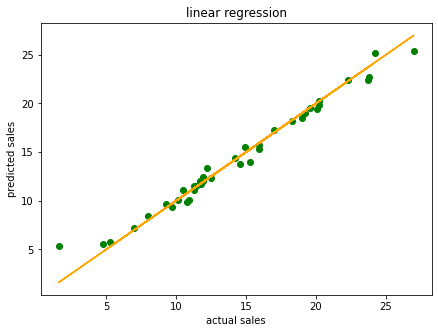

In [46]:
plt.figure(figsize=(7,5))
plt.scatter(x=y_test,y=pred,color='green')
plt.plot(y_test,y_test,color='orange')
plt.xlabel('actual sales')
plt.ylabel('predicted sales')
plt.title('linear regression')
plt.show()

In [47]:
#regularization
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[0.001,1,0.1],'random_state':[1,3,5,6,7,9,8,10]}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 1}


In [48]:
ls=Lasso(alpha=0.001,random_state=1)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)

lss

0.8689737202113851

In [49]:
cv_score=cross_val_score(ls,x,y,cv=2).mean()
cv_score

0.8917335952754487

In [50]:
#hyperparameter tunning
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [51]:
rf=RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

pred=rf.predict(x_test)

rfs=r2_score(y_test,pred)
print('r2score',rfs*100)

rfcscore=cross_val_score(rf,x,y,cv=2).mean()
print('cross validation score is',rfcscore*100)

r2score 97.77077743212611
cross validation score is 97.2137885474915


In [ ]:
#score is not increased by hyperparameter tunning

In [52]:
#save the model
import pickle
filename='advertising_sales.pkl'
pickle.dump(rf,open(filename,'wb'))

In [53]:
#conclusion
loaded_model= pickle.load(open('advertising_sales.pkl', 'rb'))
results=loaded_model.score(x_test,y_test)
print(results)

0.9777077743212611


In [54]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["predicted","original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
predicted,9.754,11.6545,14.473,11.669,13.257,20.104,12.404,11.738,22.737,17.225,...,5.704,7.11,11.988,11.3525,5.836,10.06,15.697,25.349,5.366,14.044
original,9.754,11.6545,14.473,11.669,13.257,20.104,12.404,11.738,22.737,17.225,...,5.704,7.11,11.988,11.3525,5.836,10.06,15.697,25.349,5.366,14.044
